In [20]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_iris

### Preparing the dataset

In [21]:
# Load iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data,
                       columns=iris.feature_names)

In [22]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# the two features to be used
col1 = "sepal length (cm)"
col2 = "sepal width (cm)"

In [24]:
# new dataframe with only two features
new_df = iris_df[[col1, col2]].copy()
new_df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

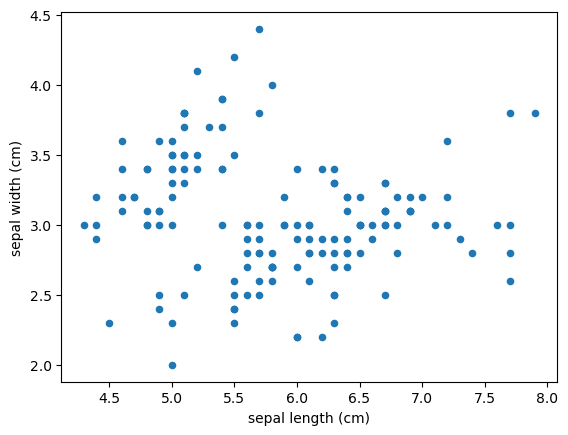

In [25]:
new_df.plot.scatter(col1, col2)

## Hierarchical Clustering

### Dendrogram

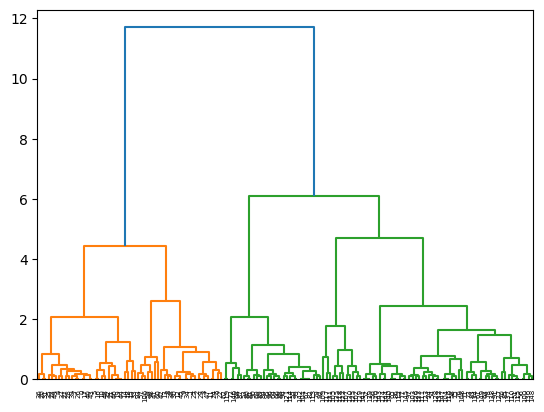

In [7]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

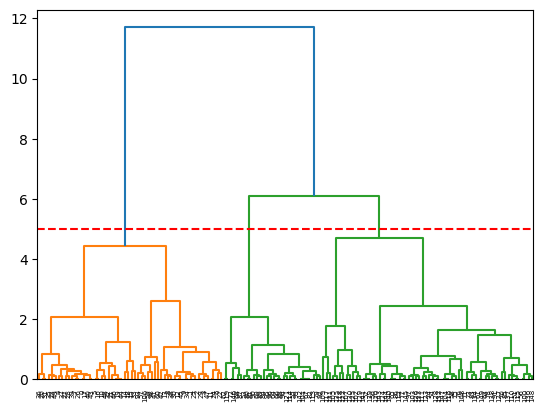

In [26]:
dendrogram = sch.dendrogram(sch.linkage(new_df, method='ward'))

# plot horizontal line at y = 5
plt.axhline(y=5, color='r', linestyle='--')
plt.show()

In [28]:
agg_model = AgglomerativeClustering(n_clusters=3,
                                    metric='euclidean',
                                    linkage='ward')
agg_model.fit(new_df)

AgglomerativeClustering(n_clusters=3)

In [33]:
new_df['clusters'] = agg_model.labels_
new_df

,sepal length (cm),sepal width (cm),clusters
0,5.1,3.5,1
1,4.9,3.0,1
2,4.7,3.2,1
3,4.6,3.1,1
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,2
147,6.5,3.0,0
148,6.2,3.4,0


<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

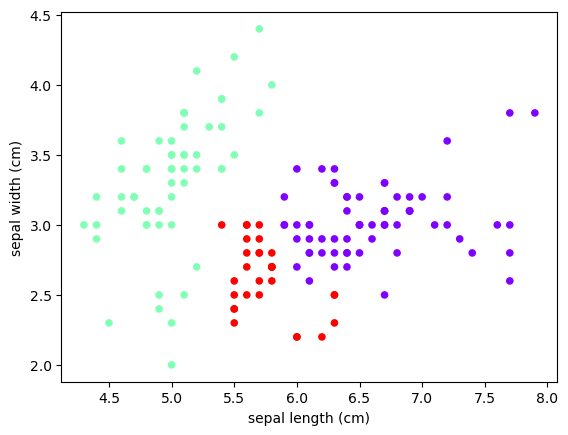

In [34]:
new_df.plot.scatter(col1, col2, c=agg_model.labels_, cmap="rainbow", colorbar=False)

## KMeans
### Silhouette Score

In [37]:
# k_range is from k=2 to k=14
k_range = range(2, 15)

highest_score = -1
k_with_highest_score = -1

for k in k_range:
  km_model = KMeans(n_clusters=k, n_init='auto')
  km_model.fit(new_df)
  km_labels = km_model.predict(new_df)
  avg = silhouette_score(new_df, km_labels)

  print((k, round(avg, 4)))

  if avg > highest_score:
    highest_score = avg
    k_with_highest_score = k

(2, 0.5738)
(3, 0.6272)
(4, 0.5809)
(5, 0.5269)
(6, 0.4726)
(7, 0.4705)
(8, 0.4606)
(9, 0.4306)
(10, 0.4483)
(11, 0.331)
(12, 0.4231)
(13, 0.3806)
(14, 0.3955)


In [38]:
print("K = " + str(k_with_highest_score))
print("Score = " + str(highest_score))

K = 3
Score = 0.6272071703821408


In [ ]:
km_model = KMeans(n_clusters=k_with_highest_score, n_init='auto', random_state=42)
km_model.fit(new_df)

KMeans(n_clusters=3)

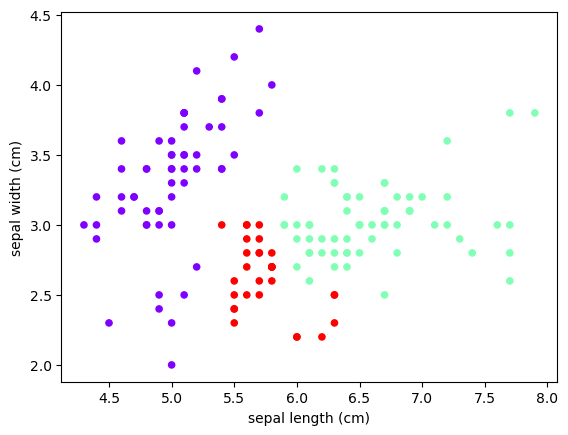

In [36]:
new_df.plot.scatter(col1, col2, c=km_model.labels_, cmap="rainbow", colorbar=False)
plt.show()

### Elbow Method

In [ ]:
inertias = []
# k_range is from k=2 to k=14
k_range = range(2, 15)

for k in k_range:
  km_model = KMeans(n_clusters=k, n_init="auto")
  km_model.fit(new_df)
  inertias.append([k, km_model.inertia_])

inertias

[[2, 58.20409278906671],
 [3, 37.05070212765958],
 [4, 28.22906654298083],
 [5, 21.220005358665205],
 [6, 17.350183760683763],
 [7, 15.330548464832443],
 [8, 14.007000313412082],
 [9, 13.000348153497136],
 [10, 9.781850371791231],
 [11, 10.097073688566338],
 [12, 8.438670761814729],
 [13, 7.978918449971085],
 [14, 6.838502297410194]]

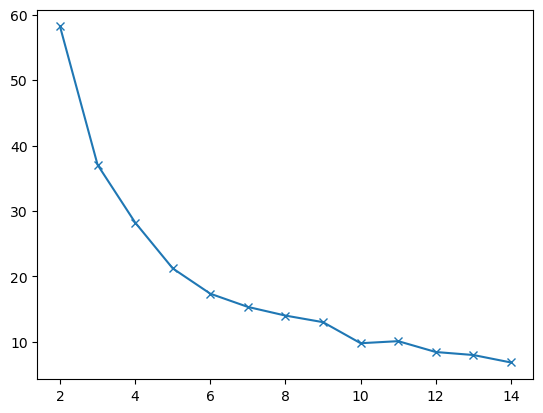

In [ ]:
inertias = np.array(inertias)
plt.plot(inertias[:, 0], inertias[:, 1], 'x-')
plt.show()

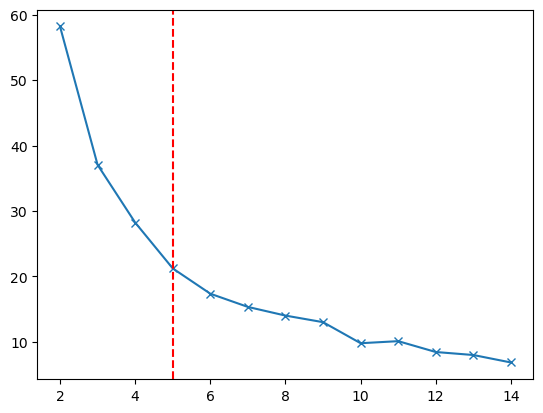

In [ ]:
plt.plot(inertias[:, 0], inertias[:, 1], 'x-')

# plot a vertical line at x = 5
plt.axvline(x=5, color='r', linestyle='--')
plt.show()

In [18]:
km_model = KMeans(n_clusters=4, n_init="auto")
km_model.fit(new_df)

KMeans(n_clusters=4)

In [ ]:
# finding clusters: 4 features
# 4 features --> 2 features (for the purposes of visualization / plotting)
# - PCA
# - tSNE
# - UMAP

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

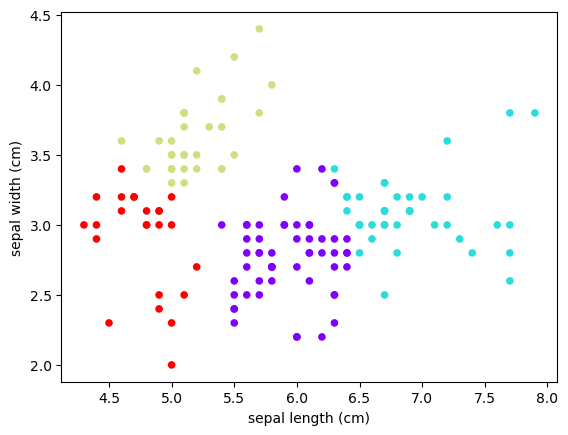

In [ ]:
new_df.plot.scatter(col1, col2, c=km_model.labels_,
                    cmap="rainbow",
                    colorbar=False)